In [52]:
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt 
from matplotlib import colors
import matplotlib.ticker as mtick
import plotly.graph_objects as go
import random
import math
import pandas as pd

## Load preprocessed data

In [53]:
data = pd.read_csv('../data/interim/preprocessed_data.csv', sep = "," , encoding = 'utf-8')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1628a,CUS_0x1000,1,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,26.612093,122.0,Yes,42.94109,244.750283,Low_spent_Large_value_payments,252.924793,Standard
1,0x1628b,CUS_0x1000,2,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,29.439759,123.0,Yes,42.94109,176.132567,High_spent_Small_value_payments,311.542510,Poor
2,0x1628c,CUS_0x1000,3,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,38.285928,124.0,Yes,42.94109,109.056519,High_spent_Medium_value_payments,368.618557,Poor
3,0x1628d,CUS_0x1000,4,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,32.843081,125.0,Yes,42.94109,87.909909,High_spent_Medium_value_payments,419.765167,Poor
4,0x1628e,CUS_0x1000,5,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,32.330508,126.0,Yes,42.94109,191.834767,Low_spent_Large_value_payments,305.840309,Poor


## Plot distribution of each feature

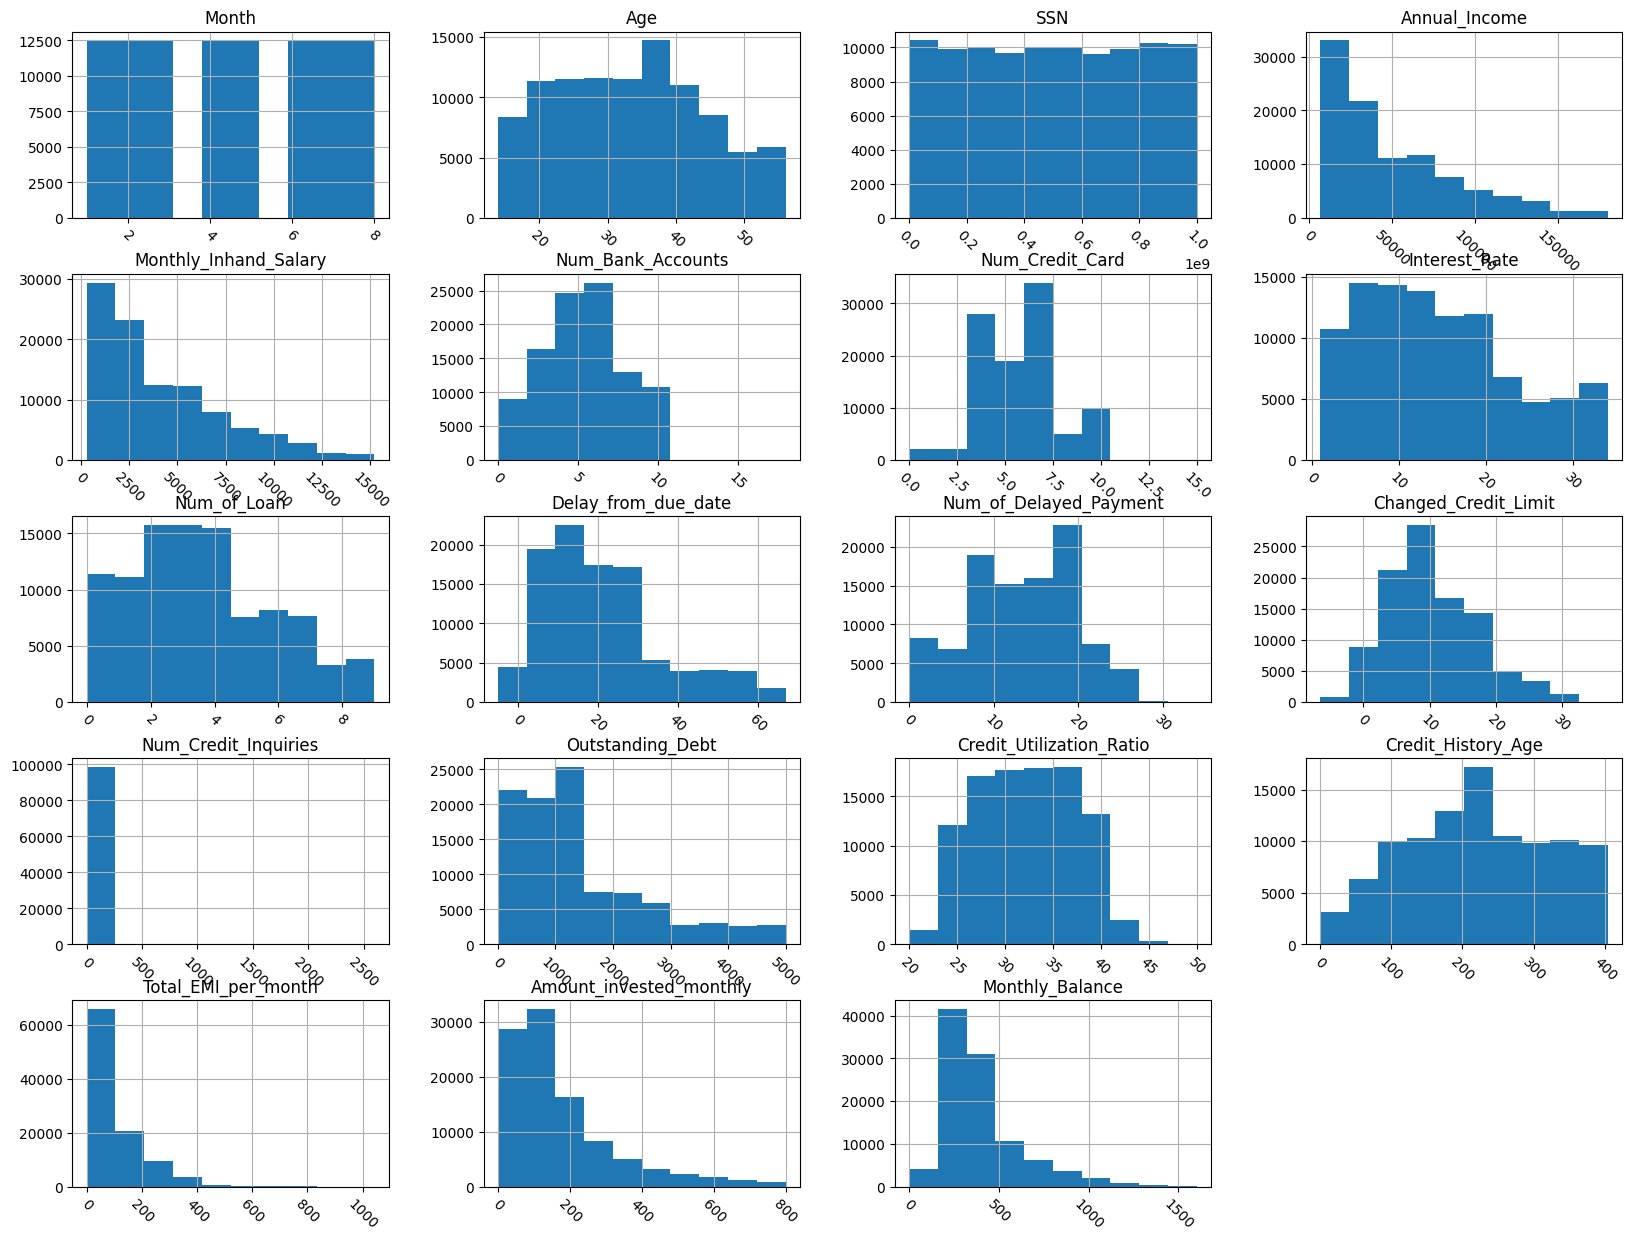

In [54]:
data.hist(figsize=(20,15), xrot=-45)
plt.show()

## Plot target distribution

<Axes: xlabel='Credit_Score', ylabel='count'>

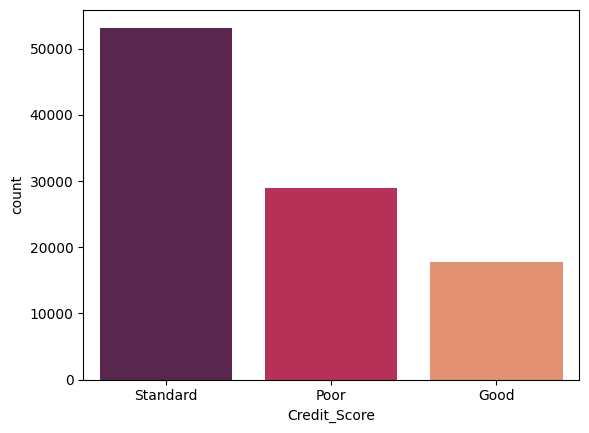

In [55]:
sns.countplot(data=data, x='Credit_Score', hue='Credit_Score', palette='rocket')

# Factor 1 : Personal information

## What is effect of age on target ?

In [56]:
data['Age'].unique()

array([17, 18, 25, 26, 19, 43, 44, 27, 15, 51, 52, 30, 31, 40, 45, 28, 14,
       36, 37, 50, 20, 41, 42, 46, 24, 54, 32, 55, 38, 39, 22, 23, 29, 48,
       49, 35, 53, 21, 33, 34, 47, 16, 56], dtype=int64)

<Axes: xlabel='Age', ylabel='Density'>

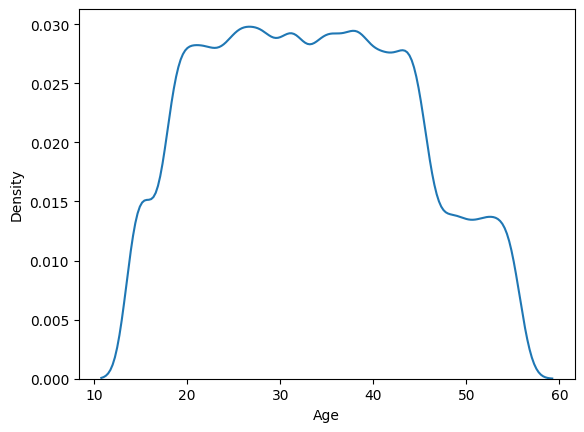

In [57]:
sns.kdeplot(data['Age'])

In [58]:
df_copy = data.copy()

# Define the age groups and their corresponding labels
age_bins = [14, 24, 34, 44, 54, 64, 74]
age_labels = ['14-24', '25-34', '35-44', '45-54', '55-64', '65-74']

# Create the "Grouped_Age" column
df_copy['Grouped_Age'] = pd.cut(df_copy['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the first few rows to verify the new column
print(df_copy[['Age', 'Grouped_Age']].head())

   Age Grouped_Age
0   17       14-24
1   17       14-24
2   17       14-24
3   17       14-24
4   17       14-24


<Axes: xlabel='Grouped_Age', ylabel='count'>

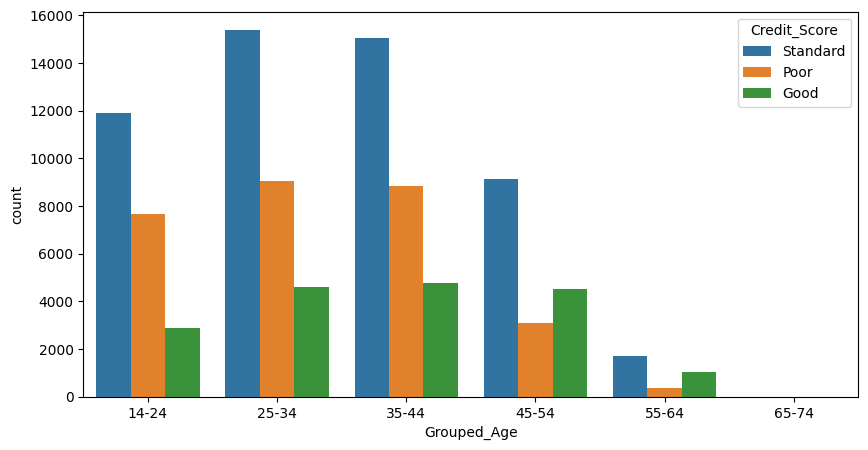

In [59]:
# Now, use the filtered DataFrame for the countplot
plt.figure(figsize=(10,5))
sns.countplot(data=df_copy, x='Grouped_Age', hue='Credit_Score')

## Does Occupation play a role?

In [60]:
data['Occupation'].unique()

array(['Lawyer', 'Mechanic', 'Media_Manager', 'Doctor', 'Journalist',
       'Accountant', 'Manager', 'Entrepreneur', 'Scientist', 'Architect',
       'Teacher', 'Engineer', 'Writer', 'Developer', 'Musician'],
      dtype=object)

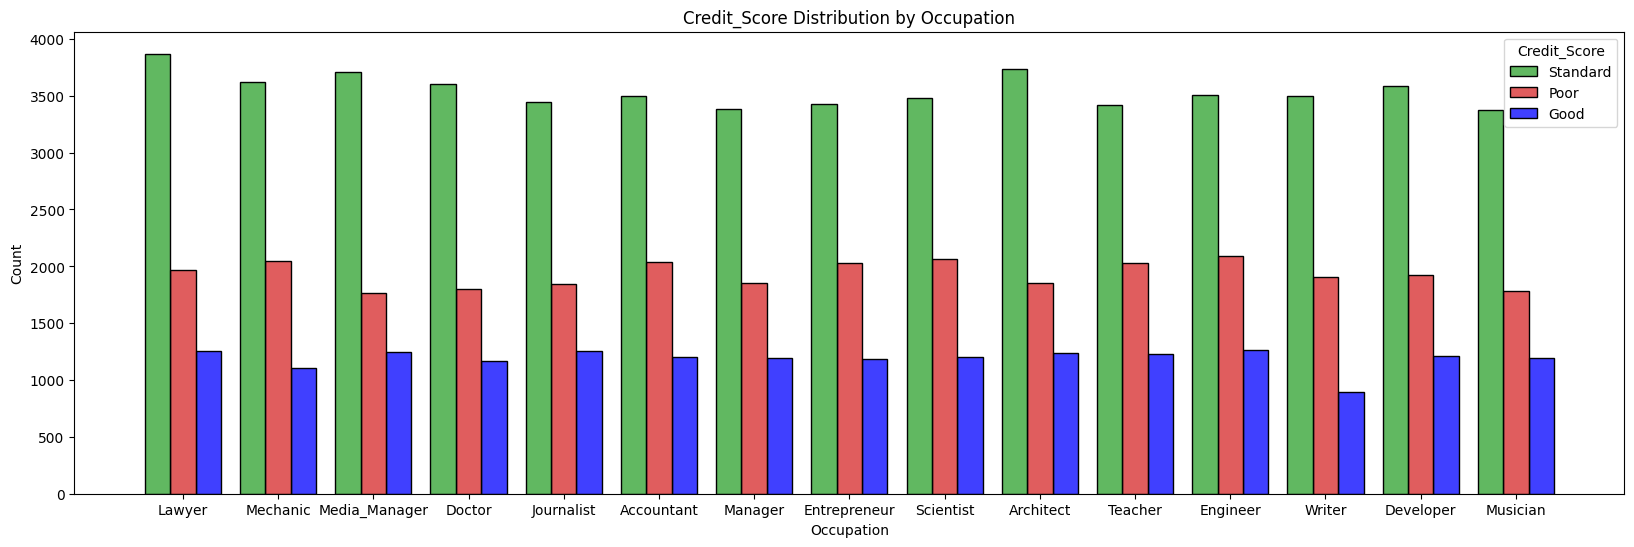

In [61]:
colors = ["#2ca02c", "#d62728", 'blue']

# Set custom figure dimensions
plt.figure(figsize=(20, 6))

# Create the histogram plot with customized colors and dimensions
sns.histplot(data=data, x="Occupation", hue="Credit_Score", multiple="dodge", shrink=.8, palette=colors)

# Customize other plot properties like titles, labels, etc.
plt.title("Credit_Score Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")

# Display the plot
plt.show()

## Which occupation tends to have higher outstanding debt?

In [62]:
occupation_distribution=data['Occupation'].value_counts()
occupation_distribution

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

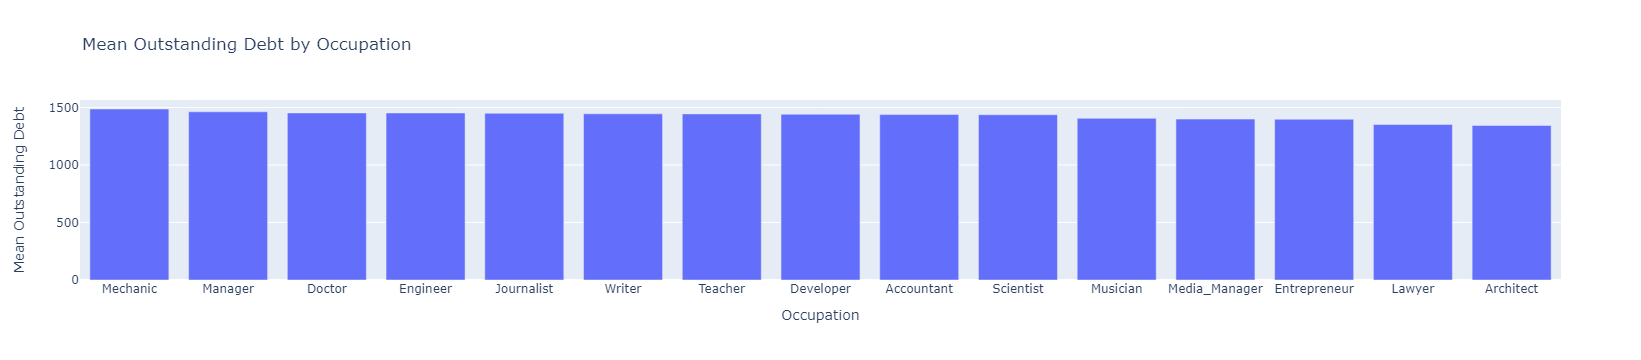

In [63]:
col_df =data.groupby('Occupation')['Outstanding_Debt'].mean().reset_index().sort_values(by='Outstanding_Debt', ascending=False)

# Create a bar plot using Plotly Express
fig = px.bar(col_df, x='Occupation', y='Outstanding_Debt', title='Mean Outstanding Debt by Occupation')
fig.update_layout(xaxis_title='Occupation', yaxis_title='Mean Outstanding Debt')
fig.show()

## Which occupation group have highest and lowest number of loan ?

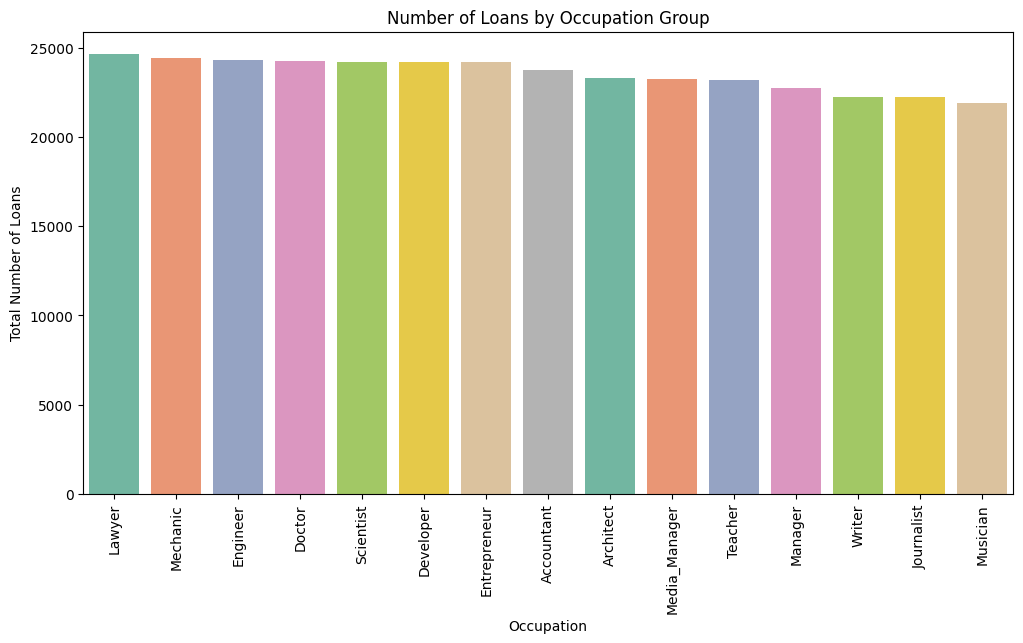

In [64]:
# Calculate the total number of loans for each occupation group
occupation_loan_counts = data.groupby('Occupation')['Num_of_Loan'].sum().reset_index()

# Sort the data to find the occupation group with the highest and lowest number of loans
occupation_loan_counts = occupation_loan_counts.sort_values(by='Num_of_Loan', ascending=False)

# Create a bar plot to visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=occupation_loan_counts, x='Occupation', y='Num_of_Loan', palette='Set2', hue='Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Number of Loans')
plt.title('Number of Loans by Occupation Group')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Factor 2 : Financial information

## How Annual_salary Affect on our target?

In [72]:
credit_good = data[data.Credit_Score == 'Good']
credit_good.Annual_Income.describe()

count     17828.000000
mean      65203.672105
std       44484.883431
min        7189.540000
25%       29709.730000
50%       44927.860000
75%       97417.425000
max      179825.360000
Name: Annual_Income, dtype: float64

In [73]:
credit_std = data[data.Credit_Score == 'Standard']
credit_std.Annual_Income.describe()

count     53174.000000
mean      50987.164840
std       37569.335731
min        7006.035000
25%       19998.330000
50%       36824.175000
75%       72904.160000
max      179987.280000
Name: Annual_Income, dtype: float64

In [74]:
credit_poor = data[data.Credit_Score == 'Poor']
credit_poor.Annual_Income.describe()

count     28998.000000
mean      40584.515325
std       31969.248921
min        7005.930000
25%       16770.910000
50%       32064.860000
75%       57877.950000
max      179987.280000
Name: Annual_Income, dtype: float64

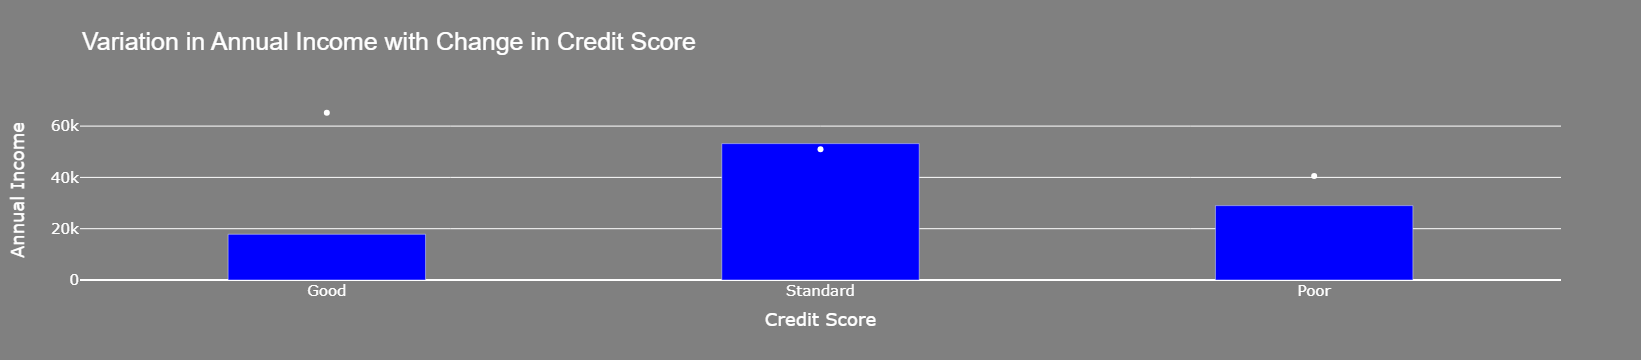

In [75]:
credit = {
    'Good' : credit_good.Annual_Income.mean(),
    'Standard' : credit_std.Annual_Income.mean(),
    'Poor' : credit_poor.Annual_Income.mean()
}

count = {
    'Good' : credit_good.Annual_Income.count(),
    'Standard' : credit_std.Annual_Income.count(),
    'Poor' : credit_poor.Annual_Income.count()
}


fig = px.bar(x=list(count.keys()), y=list(count.values()), labels={'x': 'Credit Score', 'y': 'Annual Income'}, title='Variation in Annual Income with Change in Credit Score')
fig.update_traces(marker_color='blue', width=0.4)


fig.add_trace(px.scatter(x=list(credit.keys()), y=list(credit.values()),color_discrete_sequence=['white'] ,labels={'x': 'Credit Score', 'y': 'User'}).data[0])

fig.update_xaxes(type='category')  

fig.update_layout(

    plot_bgcolor='gray', paper_bgcolor='gray',
                        title_font=dict(size=25, color='white', family="Muli, sans-serif"),
    font=dict(color='white',size=15)
)

fig.show()

In [76]:
credit_good = data[data.Credit_Score == 'Good']
credit_good.Annual_Income.describe()

count     17828.000000
mean      65203.672105
std       44484.883431
min        7189.540000
25%       29709.730000
50%       44927.860000
75%       97417.425000
max      179825.360000
Name: Annual_Income, dtype: float64

## Does the monthly inhand salary affect the target?

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Density'>

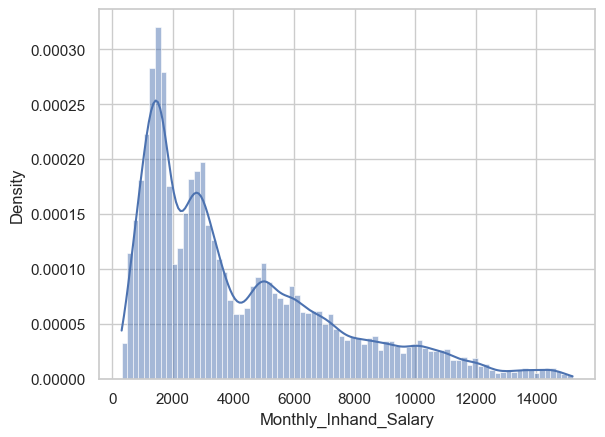

In [86]:
sns.histplot(data['Monthly_Inhand_Salary'], kde=True, stat="density")

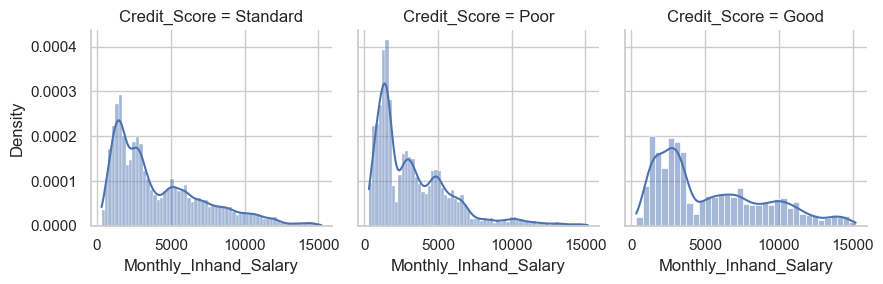

In [89]:
grid = sns.FacetGrid(data, col='Credit_Score')
grid.map(sns.histplot, 'Monthly_Inhand_Salary', kde=True, stat="density")

# Factor 3 : Bank transactions

## How does number of bank accounts affect the target?

In [90]:
credit_score = data['Credit_Score']
num_bank_accounts = data['Num_Bank_Accounts']

# Exploratory Data Analysis
print("Summary Statistics:")
print(data[['Credit_Score', 'Num_Bank_Accounts']].describe())

Summary Statistics:
       Num_Bank_Accounts
count      100000.000000
mean            5.368980
std             2.593184
min             0.000000
25%             3.000000
50%             5.000000
75%             7.000000
max            18.000000


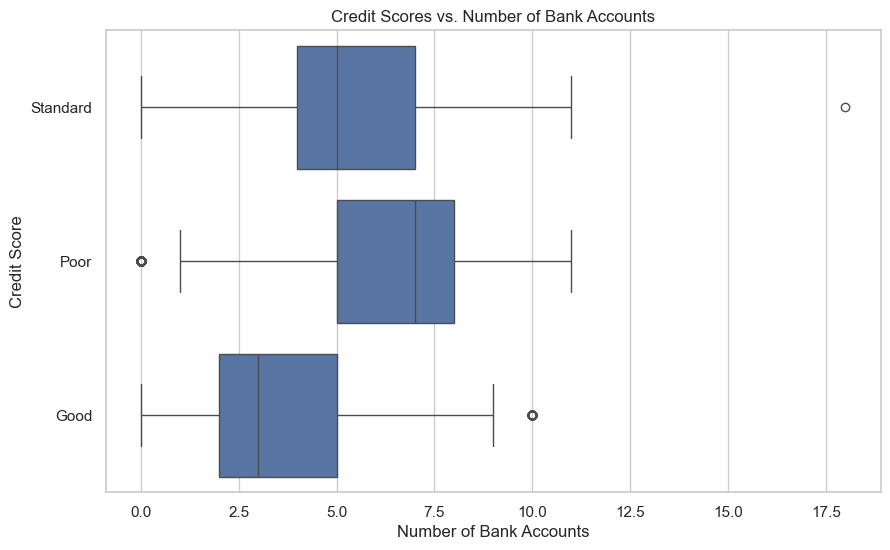

In [91]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_Bank_Accounts', y='Credit_Score', data=data)
plt.title('Credit Scores vs. Number of Bank Accounts')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Credit Score')
plt.show()

## Does the number of credit inquiries made by a customer impact their credit score? Is there an optimal number of inquiries to maintain a good credit score?

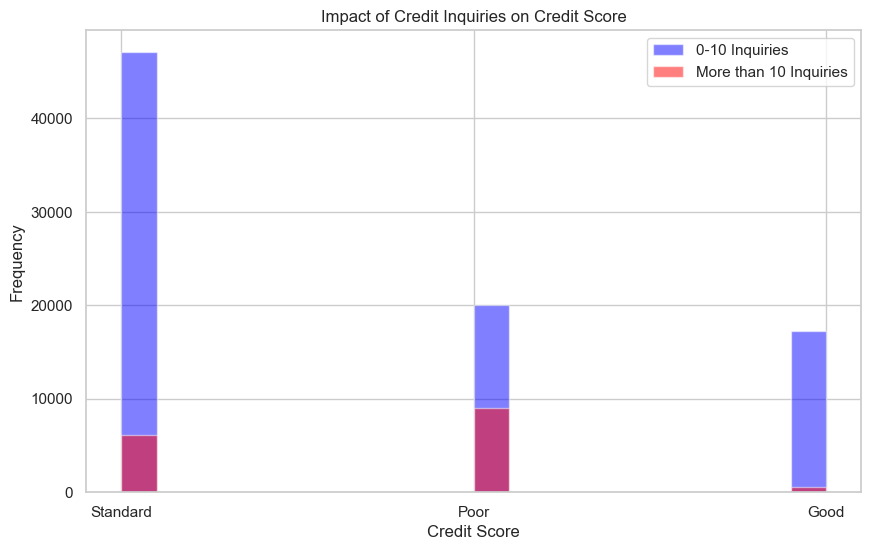

In [92]:
# Create a histogram to visualize the distribution of credit scores for different numbers of credit inquiries
plt.figure(figsize=(10, 6))
plt.hist(data[data['Num_Credit_Inquiries'] <= 10]['Credit_Score'], bins=20, alpha=0.5, label='0-10 Inquiries', color='blue')
plt.hist(data[data['Num_Credit_Inquiries'] > 10]['Credit_Score'], bins=20, alpha=0.5, label='More than 10 Inquiries', color='red')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Impact of Credit Inquiries on Credit Score')
plt.legend()
plt.grid(True)
plt.show()

## What is the relationship between a customer's credit card utilization ratio and their payment behavior? How can we incentivize customers to use their cards more responsibly?

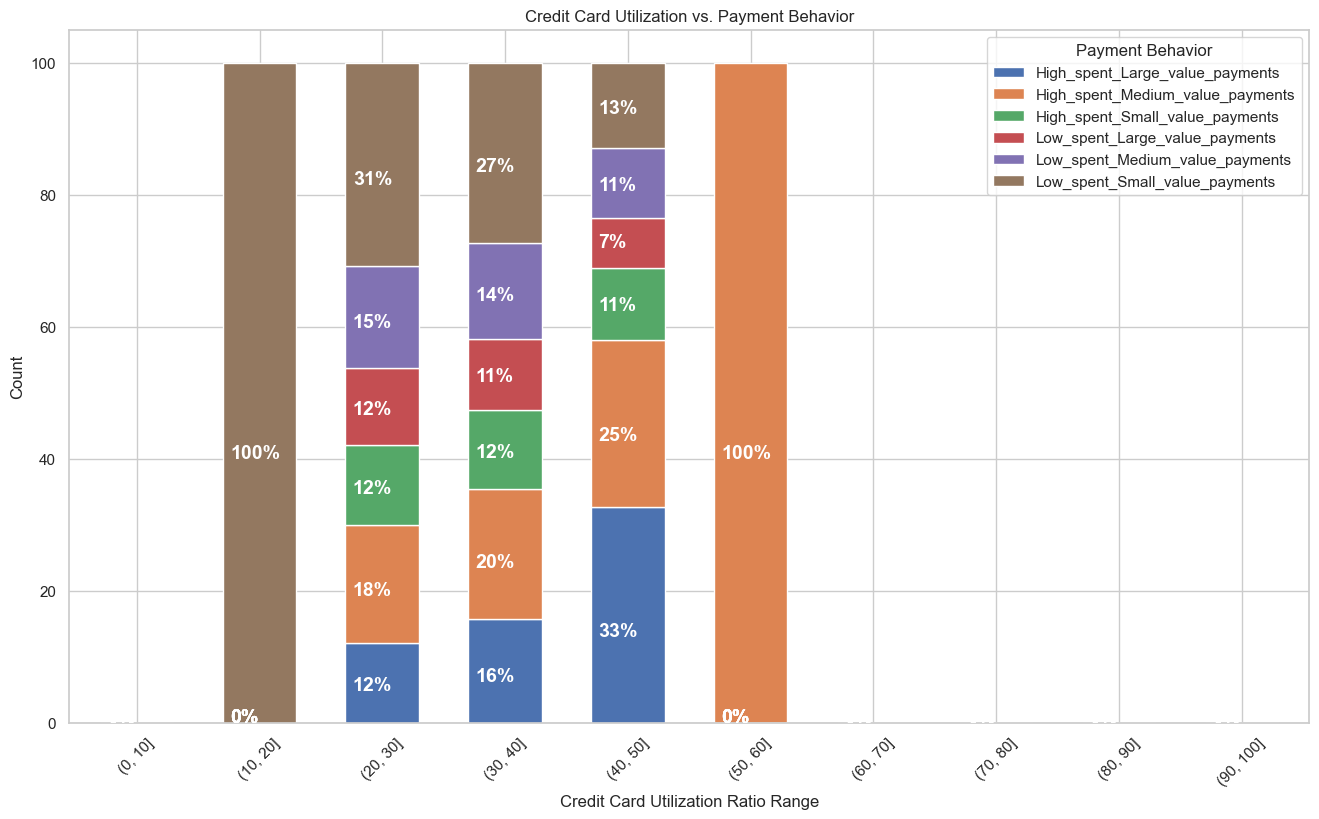

In [96]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data_copy = data.copy()

data_copy['Utilization_Ratio_Bin'] = pd.cut(data_copy['Credit_Utilization_Ratio'], bins)

grouped = data_copy.groupby(['Utilization_Ratio_Bin', 'Payment_Behaviour'], observed=False).size().unstack(fill_value=0)

ax = (grouped.T * 100.0 / grouped.T.sum()).T.plot(
    kind='bar',
    width=0.6,
    rot=0,
    stacked=True,
    figsize=(16, 9)
)

ax.plot()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(
        '{:.0f}%'.format(height),
        (p.get_x() + 0.1 * width, p.get_y() + 0.4 * height),
        color='white',
        weight='bold',
        size=14,
    )

plt.title('Credit Card Utilization vs. Payment Behavior')
plt.xlabel('Credit Card Utilization Ratio Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Payment Behavior')

plt.show()

## The Payment behaviour with the credit score

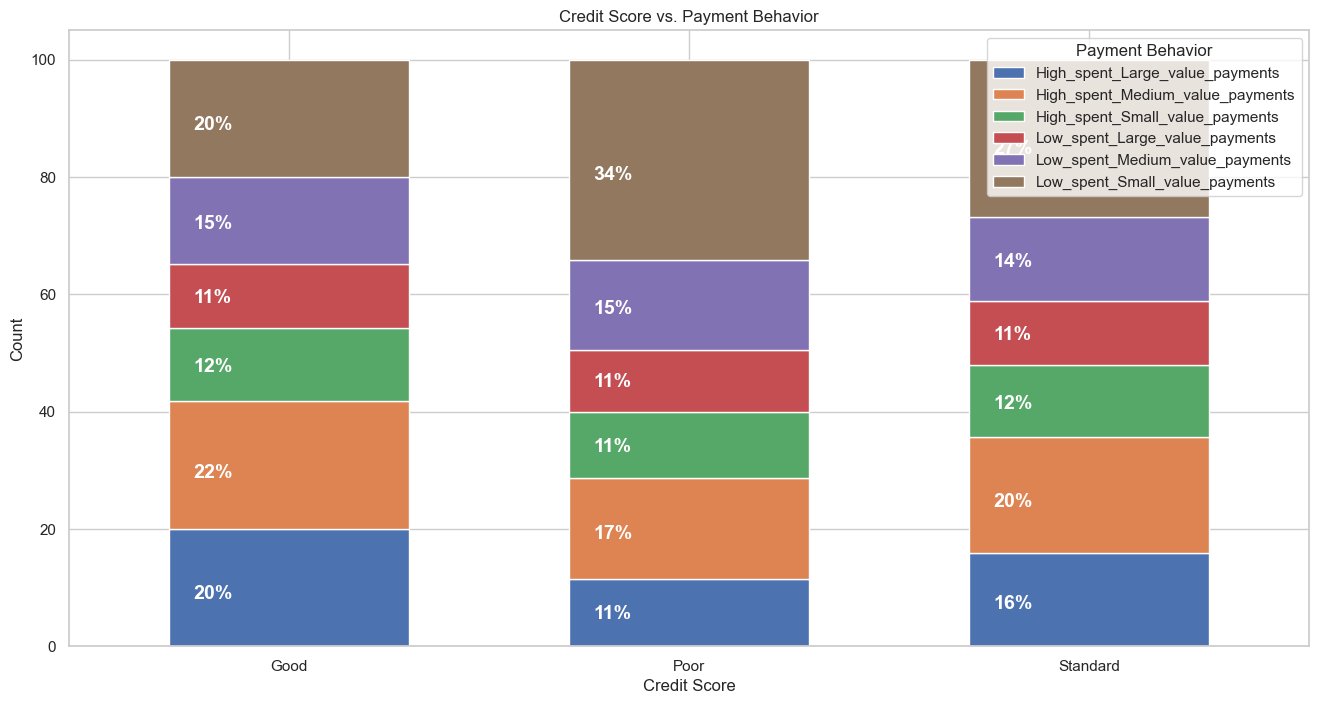

In [97]:
grouped = data.groupby(['Credit_Score', 'Payment_Behaviour']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = (grouped.T * 100.0 / grouped.T.sum()).T.plot(
    kind='bar',
    width=0.6,
    rot=0,
    stacked=True,
    figsize=(16, 8)
)

# Add annotations to the bars
ax.plot()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(
        '{:.0f}%'.format(height),
        (p.get_x() + 0.1 * width, p.get_y() + 0.4 * height),
        color='white',
        weight='bold',
        size=14,
    )

# Customize the plot
plt.title('Credit Score vs. Payment Behavior')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Behavior')

plt.show()

# Check target variable balance

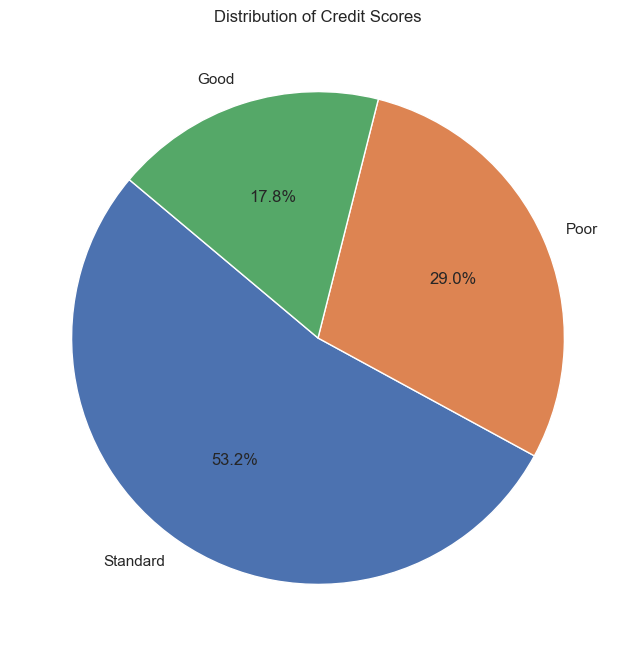

In [98]:
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame named 'df'
# Create a histogram to count the number of customers in each credit score range
plt.figure(figsize=(8, 8))
plt.pie(data['Credit_Score'].value_counts(), labels=data['Credit_Score'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Scores')
plt.show()

**Warning:** The graph output indicates that the data is unbalanced. Class Good constitutes 53.2% of the sample, while classes Poor and Average constitute 29% and 17.8% respectively.
